In [1]:
# ONLY RUN THIS IF YOU'RE IN GOOGLE COLAB
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Thesis/Pintu-Air')

# Verify you're in the right place
!pwd
!ls -la

Mounted at /content/drive
/content/drive/MyDrive/Thesis/Pintu-Air
total 11696
-rw------- 1 root root 6428389 May 28 10:08 '03 Result Data Cleaning Part 3.csv'
-rw------- 1 root root 5535519 May 28 10:43  04c_ARIMA_Manggarai.ipynb
-rw------- 1 root root   12122 May 28 10:08  LibrariesFunctions.py


In [2]:
# Import libraries and functions
%run LibrariesFunctions.py
from LibrariesFunctions import *

# Import Data

In [3]:
data_x_train, data_x_test, data_y_train, data_y_test = read_data('Manggarai')

Full Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31224 entries, 2021-10-16 00:00:00 to 2025-05-08 23:00:00
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Raw                31196 non-null  float64
 1   ID_Cleaned            31224 non-null  int64  
 2   Katulampa (air)       31224 non-null  float64
 3   Katulampa (cuaca)     31224 non-null  object 
 4   Depok (air)           31224 non-null  float64
 5   Depok (cuaca)         31224 non-null  object 
 6   Manggarai (air)       31224 non-null  float64
 7   Manggarai (cuaca)     31224 non-null  object 
 8   Karet (air)           31224 non-null  float64
 9   Karet (cuaca)         31224 non-null  object 
 10  Krukut (air)          31224 non-null  float64
 11  Krukut (cuaca)        31224 non-null  object 
 12  Pesanggrahan (air)    31224 non-null  float64
 13  Pesanggrahan (cuaca)  31224 non-null  object 
 14  Angke (ai

In [4]:
data_y_train

,Manggarai (air)
Tanggal,
2021-10-16 00:00:00,555.0
2021-10-16 01:00:00,555.0
2021-10-16 02:00:00,555.0
2021-10-16 03:00:00,555.0
2021-10-16 04:00:00,560.0
...,...
2025-03-04 17:00:00,850.0
2025-03-04 18:00:00,845.0
2025-03-04 19:00:00,835.0


# EDA

In [5]:
period = 24

decomposition = seasonal_decompose(
    data_y_train,
    model='additive',
    period=period,
    extrapolate_trend='freq'
)
plot_decompose(decomposition)

Output hidden; open in https://colab.research.google.com to view.

# Uji Stasioneritas

## Uji Stasioneritas terhadap Varians

$$
\begin{aligned}
H_0&: \lambda=1 \text{(Stasioner terhadap varians)}\\H_1&: \lambda\ne1\\
\end{aligned}
$$

In [6]:
lambda_opt = boxcox_transformation(data_y_train)

Lambda optimal: 1.3867
LRT statistic: 392.5892
P-value: 0.000000


In [7]:
print(f"{lambda_opt:.50f}")

1.38669545927877613245016164000844582915306091308594


Karena P-Value LR test lambda(1) = 0.000000 < 0.05, maka tolak H0, maka data tidak stasioner terhadap varians, sehingga perlu dilakukan transformasi sesuai dengan lambda optimal

In [8]:
data_y_train_pow = data_y_train ** lambda_opt
boxcox_transformation(data_y_train_pow)

Lambda optimal: 1.0000
LRT statistic: 0.0000
P-value: 0.999994


np.float64(1.0000002308565767)

## Uji Stasioneritas terhadap Mean

$$
\begin{aligned}
H_0&: \text{Data tidak stasioner terhadap mean}\\
H_1&: \text{Data stasioner terhadap mean}\\
\end{aligned}
$$

In [9]:
result = adfuller(data_y_train_pow)

# Hasil ADF test
print(f"ADF Statistic : {result[0]}")
print(f"p-value       : {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key} : {value}")

ADF Statistic : -8.929164271833155
p-value       : 9.92275172904268e-15
Critical Values:
   1% : -3.4305708146287484
   5% : -2.861637594050852
   10% : -2.56682194634312


Karena p-value 9.922758e-15 =  < 0.05, maka tolak H0, sehingga kita memiliki cukup bukti untuk menyimpulkan bahwa data stasioner terhadap mean

# ACF PACF

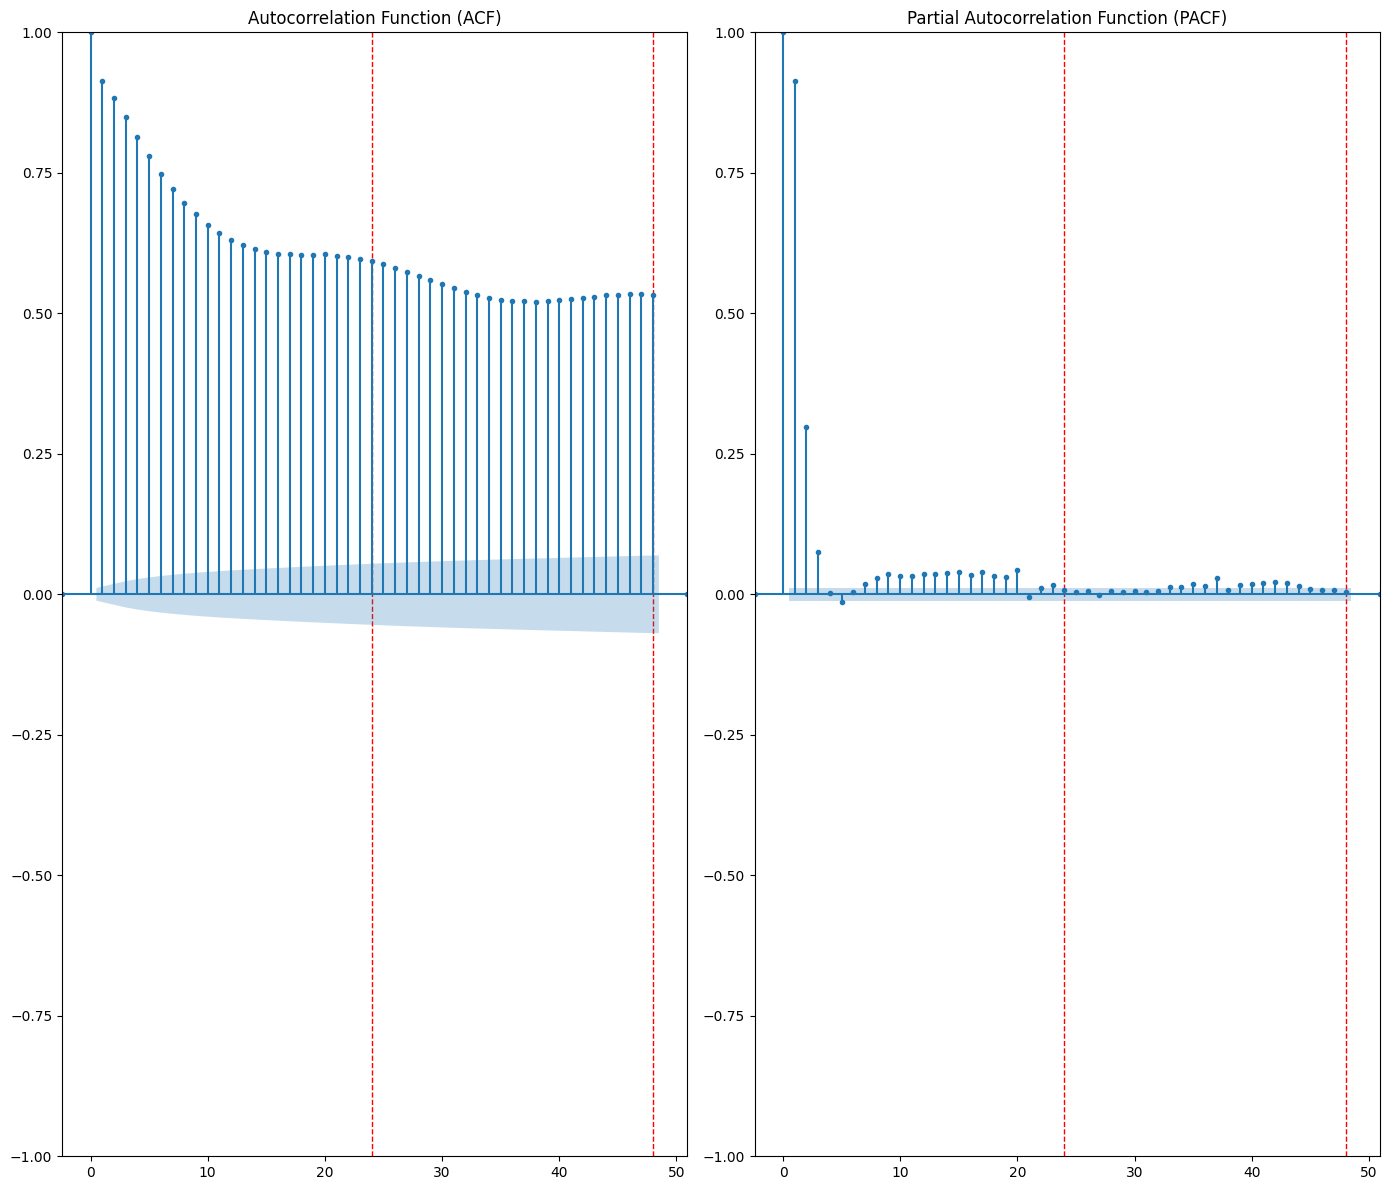

In [10]:
plot_acf_pacf(data_y_train_pow, period, 48)

# Modelling

In [11]:
# ARIMA model based on ACF PACF (q: dies down; p: cut off at lag-3)
ar_configs = [
    {'name': 'ARIMA(1,0,0)', 'model_type': 'ARIMA', 'order': (1,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(2,0,0)', 'model_type': 'ARIMA', 'order': (2,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(3,0,0)', 'model_type': 'ARIMA', 'order': (3,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(4,0,0)', 'model_type': 'ARIMA', 'order': (4,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(5,0,0)', 'model_type': 'ARIMA', 'order': (5,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(6,0,0)', 'model_type': 'ARIMA', 'order': (6,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(7,0,0)', 'model_type': 'ARIMA', 'order': (7,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(8,0,0)', 'model_type': 'ARIMA', 'order': (8,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(9,0,0)', 'model_type': 'ARIMA', 'order': (9,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(10,0,0)', 'model_type': 'ARIMA', 'order': (10,0,0), 'seasonal_order': None, 'exog': False},
]
ar_comparison = modelling (ar_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
ar_comparison


Testing ARIMA(1,0,0)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:        Manggarai (air)   No. Observations:                29662
Model:                 ARIMA(1, 0, 0)   Log Likelihood             -211985.459
Date:                Wed, 28 May 2025   AIC                         423976.917
Time:                        10:47:01   BIC                         424001.810
Sample:                    10-16-2021   HQIC                        423984.909
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7557.9310     30.184    250.392      0.000    7498.771    7617.091
ar.L1          0.9133      0.001   1052.321      0.000       0.91

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Manggarai (air),"ARIMA(1,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,21.4668,40.7089
1,Manggarai (air),"ARIMA(2,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,19.8556,40.3410
2,Manggarai (air),"ARIMA(3,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,19.7526,40.2858
3,Manggarai (air),"ARIMA(4,0,0)",Tidak,0.000000,Tidak,0.001000,Tidak,19.7515,40.2836
4,Manggarai (air),"ARIMA(5,0,0)",Tidak,0.000000,Tidak,0.001000,Tidak,19.7512,40.2918
5,Manggarai (air),"ARIMA(6,0,0)",Tidak,0.000000,Tidak,0.001000,Tidak,19.7511,40.2889
6,Manggarai (air),"ARIMA(7,0,0)",Tidak,0.000000,Tidak,0.001000,Tidak,19.7487,40.2744
7,Manggarai (air),"ARIMA(8,0,0)",Tidak,0.000000,Tidak,0.001000,Tidak,19.7414,40.2510
8,Manggarai (air),"ARIMA(9,0,0)",Tidak,0.000000,Tidak,0.001000,Tidak,19.7293,40.2251
9,Manggarai (air),"ARIMA(10,0,0)",Tidak,0.000000,Tidak,0.001000,Tidak,19.7197,40.2040


In [12]:
# Try MA models
ma_configs = [
    {'name': 'ARIMA(0,0,1)', 'model_type': 'ARIMA', 'order': (0,0,1), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,2)', 'model_type': 'ARIMA', 'order': (0,0,2), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,3)', 'model_type': 'ARIMA', 'order': (0,0,3), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,4)', 'model_type': 'ARIMA', 'order': (0,0,4), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,5)', 'model_type': 'ARIMA', 'order': (0,0,5), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,6)', 'model_type': 'ARIMA', 'order': (0,0,6), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,7)', 'model_type': 'ARIMA', 'order': (0,0,7), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,8)', 'model_type': 'ARIMA', 'order': (0,0,8), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,9)', 'model_type': 'ARIMA', 'order': (0,0,9), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,10)', 'model_type': 'ARIMA', 'order': (0,0,10), 'seasonal_order': None, 'exog': False},
]
ma_comparison = modelling (ma_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
ma_comparison


Testing ARIMA(0,0,1)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:        Manggarai (air)   No. Observations:                29662
Model:                 ARIMA(0, 0, 1)   Log Likelihood             -227334.312
Date:                Wed, 28 May 2025   AIC                         454674.623
Time:                        10:49:22   BIC                         454699.516
Sample:                    10-16-2021   HQIC                        454682.614
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7557.9375      5.111   1478.744      0.000    7547.920    7567.955
ma.L1          0.6939      0.001    624.292      0.000       0.69

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Manggarai (air),"ARIMA(0,0,1)",Ya,0.000000,Tidak,0.001000,Tidak,31.9612,42.5656
1,Manggarai (air),"ARIMA(0,0,2)",Ya,0.000000,Tidak,0.001000,Tidak,27.3017,42.4171
2,Manggarai (air),"ARIMA(0,0,3)",Ya,0.000000,Tidak,0.001000,Tidak,24.9531,42.2806
3,Manggarai (air),"ARIMA(0,0,4)",Ya,0.000000,Tidak,0.001000,Tidak,23.4915,42.1536
4,Manggarai (air),"ARIMA(0,0,5)",Ya,0.000000,Tidak,0.001000,Tidak,22.5255,42.0283
5,Manggarai (air),"ARIMA(0,0,6)",Ya,0.000000,Tidak,0.001000,Tidak,21.8819,41.9327
6,Manggarai (air),"ARIMA(0,0,7)",Ya,0.000000,Tidak,0.001000,Tidak,21.4373,41.8236
7,Manggarai (air),"ARIMA(0,0,8)",Ya,0.000000,Tidak,0.001000,Tidak,21.1194,41.7449
8,Manggarai (air),"ARIMA(0,0,9)",Ya,0.000000,Tidak,0.001000,Tidak,20.8919,41.6753
9,Manggarai (air),"ARIMA(0,0,10)",Ya,0.000000,Tidak,0.001000,Tidak,20.7075,41.6008


In [13]:
# Try MA models
ma2_configs = [
    {'name': 'ARIMA(0,0,11)', 'model_type': 'ARIMA', 'order': (0,0,11), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,12)', 'model_type': 'ARIMA', 'order': (0,0,12), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,13)', 'model_type': 'ARIMA', 'order': (0,0,13), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,14)', 'model_type': 'ARIMA', 'order': (0,0,14), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,15)', 'model_type': 'ARIMA', 'order': (0,0,15), 'seasonal_order': None, 'exog': False}
]
ma2_comparison = modelling (ma2_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
ma2_comparison


Testing ARIMA(0,0,11)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:        Manggarai (air)   No. Observations:                29662
Model:                ARIMA(0, 0, 11)   Log Likelihood             -211786.405
Date:                Wed, 28 May 2025   AIC                         423598.810
Time:                        11:02:49   BIC                         423706.679
Sample:                    10-16-2021   HQIC                        423633.439
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7557.9355     15.409    490.487      0.000    7527.734    7588.137
ma.L1          0.6832      0.001    802.100      0.000       0.6

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Manggarai (air),"ARIMA(0,0,11)",Ya,0.000000,Tidak,0.001000,Tidak,20.5692,41.5379
1,Manggarai (air),"ARIMA(0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,20.4521,41.4726
2,Manggarai (air),"ARIMA(0,0,13)",Ya,0.000000,Tidak,0.001000,Tidak,20.3583,41.4187
3,Manggarai (air),"ARIMA(0,0,14)",Ya,0.000000,Tidak,0.001000,Tidak,20.2810,41.3670
4,Manggarai (air),"ARIMA(0,0,15)",Ya,0.000000,Tidak,0.001000,Tidak,20.2094,41.3211


In [15]:
# Try MA models
ma3_configs = [
    {'name': 'ARIMA(0,0,16)', 'model_type': 'ARIMA', 'order': (0,0,16), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,17)', 'model_type': 'ARIMA', 'order': (0,0,17), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,18)', 'model_type': 'ARIMA', 'order': (0,0,18), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,19)', 'model_type': 'ARIMA', 'order': (0,0,19), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,20)', 'model_type': 'ARIMA', 'order': (0,0,20), 'seasonal_order': None, 'exog': False},
]
ma3_comparison = modelling (ma3_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
ma3_comparison


Testing ARIMA(0,0,16)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:        Manggarai (air)   No. Observations:                29662
Model:                ARIMA(0, 0, 16)   Log Likelihood             -211142.733
Date:                Wed, 28 May 2025   AIC                         422321.466
Time:                        11:17:40   BIC                         422470.824
Sample:                    10-16-2021   HQIC                        422369.415
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7557.9347     18.906    399.766      0.000    7520.880    7594.990
ma.L1          0.6527      0.001    772.664      0.000       0.6

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Manggarai (air),"ARIMA(0,0,16)",Ya,0.000000,Tidak,0.001000,Tidak,20.1605,41.2887
1,Manggarai (air),"ARIMA(0,0,17)",Ya,0.000000,Tidak,0.001000,Tidak,20.1185,41.2577
2,Manggarai (air),"ARIMA(0,0,18)",Ya,0.000000,Tidak,0.001000,Tidak,20.0978,41.2278
3,Manggarai (air),"ARIMA(0,0,19)",Ya,0.000000,Tidak,0.001000,Tidak,20.0919,41.2053
4,Manggarai (air),"ARIMA(0,0,20)",Ya,0.000000,Tidak,0.001000,Tidak,20.0408,41.1464


In [16]:
compare = pd.concat([ar_comparison,
                     ma_comparison,
                     ma2_comparison,
                     ma3_comparison
                     ])
compare.to_csv(f'model_comparison_{data_y_train.name}_results.csv')

In [ ]:
# Create comparison table
print(f"\n{'='*100}")
print("MODEL COMPARISON TABLE")
print(f"{'='*100}")

comparison_df = pd.DataFrame(results_list)
print(comparison_df.to_string(index=False))

# Save to CSV (optional)
# comparison_df.to_csv('model_comparison_results.csv', index=False)

print(f"\n{'='*100}")
print("ANALYSIS COMPLETE")
print(f"{'='*100}")

# Find best models based on different criteria
print("\nBEST MODELS ANALYSIS:")
print("-" * 50)

# Filter only successful models (no errors)
successful_models = comparison_df[
    (comparison_df['RMSE Training'] != 'Error') &
    (comparison_df['RMSE Testing'] != 'Error')
].copy()

if not successful_models.empty:
    # Convert RMSE columns to numeric
    successful_models['RMSE_Train_Numeric'] = pd.to_numeric(successful_models['RMSE Training'])
    successful_models['RMSE_Test_Numeric'] = pd.to_numeric(successful_models['RMSE Testing'])

    # Best training RMSE
    best_train = successful_models.loc[successful_models['RMSE_Train_Numeric'].idxmin()]
    print(f"Best Training RMSE: {best_train['Model']} (RMSE: {best_train['RMSE Training']})")

    # Best testing RMSE
    best_test = successful_models.loc[successful_models['RMSE_Test_Numeric'].idxmin()]
    print(f"Best Testing RMSE: {best_test['Model']} (RMSE: {best_test['RMSE Testing']})")

    # Models with all assumptions met
    good_models = successful_models[
        (successful_models['Semua Variabel Signifikan'] == 'Ya') &
        (successful_models['White Noise?'] == 'Ya') &
        (successful_models['Distribusi Normal?'] == 'Ya')
    ]

    if not good_models.empty:
        print(f"\nModels meeting all statistical assumptions:")
        for _, model in good_models.iterrows():
            print(f"- {model['Model']}")

        # Best among good models
        best_good = good_models.loc[good_models['RMSE_Test_Numeric'].idxmin()]
        print(f"\nBest model meeting all assumptions: {best_good['Model']} (Test RMSE: {best_good['RMSE Testing']})")
    else:
        print("\nNo models meet all statistical assumptions.")
else:
    print("No successful models to analyze.")